#### Problem 1

In [24]:
def f(d, delta, Ein):
    return (d + 1) / (1 - Ein / (delta ** 2))

print(f(8, 0.1, 0.008))

44.99999999999996


#### Problem 3

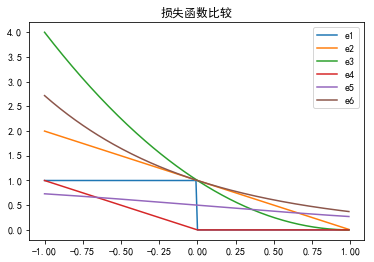

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#构造损失函数
def e1(s):
    if s > 0:
        return 0
    else:
        return 1

def e2(s):
    return max(0, 1 - s)

def e3(s):
    t = max(0, 1 - s)
    return t ** 2

def e4(s):
    return max(0, -s)

def e5(s):
    return 1 / (1 + np.exp(s))

def e6(s):
    return np.exp(-s)

x = np.arange(-1, 1, 0.01)

y1 = [e1(i) for i in x]
y2 = [e2(i) for i in x]
y3 = [e3(i) for i in x]
y4 = [e4(i) for i in x]
y5 = [e5(i) for i in x]
y6 = [e6(i) for i in x]

plt.plot(x, y1, label='e1')
plt.plot(x, y2, label='e2')
plt.plot(x, y3, label='e3')
plt.plot(x, y4, label='e4')
plt.plot(x, y5, label='e5')
plt.plot(x ,y6, label='e6')
plt.legend()
plt.title('损失函数比较')
plt.show()

#### Problem 7

In [27]:
import numpy as np
from numpy.linalg import inv

def E(u,v):
    return np.exp(u) + np.exp(2 * v) + np.exp(u * v) + u * u - 2 * u * v + 2 * v * v - 3 * u - 2 * v

def partial(point):
    u = point[0]
    v = point[1]
    pu = np.exp(u) + v * np.exp(u * v) + 2 * u - 2 * v - 3
    pv = 2 * np.exp(2 * v) + u * np.exp(u * v) - 2 * u + 4 * v - 2
    return np.array([pu, pv])

def dpartial(point):
    u = point[0]
    v = point[1]
    puu = np.exp(u) + np.exp(u * v) * (v ** 2) + 2
    pvv = 4 * np.exp(2 * v) + np.exp(u * v) * (u ** 2) + 4
    puv = np.exp(u * v) * (1 + u * v) - 2
    return np.array([[puu, puv], [puv, pvv]])


####Problem 7
point = np.zeros(2)
eta = 0.01

for i in range(5):
    point -= eta * partial(point)
    
print(point)
print(E(point[0], point[1]))

[0.09413996 0.00178911]
2.8250003566832635


#### Problem 10

In [28]:
####Problem 10
point = np.zeros(2)
eta = 0.01

for i in range(5):
    point -= inv(dpartial(point)).dot(partial(point))

print(point)
print(E(point[0], point[1]))

[0.61181172 0.07049955]
2.360823345643139


#### Problem 11

In [29]:
import numpy as np

X = np.array(
        [[1, 1, 1, 1, 1, 1],
         [1, 1, -1, 1, -1, 1],
         [1, -1, -1, 1, 1, 1],
         [1, -1, 1, 1, -1, 1],
         [1, 0, 0, 0, 0, 0],
         [1, 1, 0, 1, 0, 0]]
        )
print(np.linalg.det(X))


-15.999999999999998


#### Problem 13

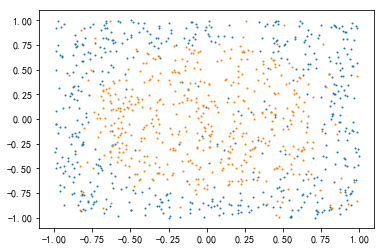

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#产生n组点
def generate(n, p=0.1):
    X = np.random.uniform(-1, 1, size=(n, 2))
    y = np.sign(np.sum(X ** 2, axis=1) - 0.6)
    #翻转
    P = np.random.uniform(0, 1, n)
    y[P < p] *= -1
    #产生数据
    return X, y

#数据数量
n = 1000
#实验次数
m = 1000     
X, y = generate(n)

plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
plt.show()

0.505447


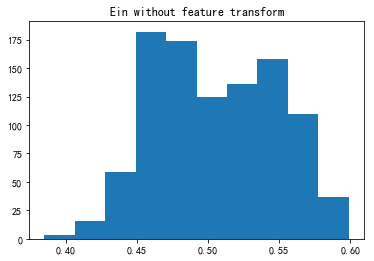

In [31]:
#Problem 13
Ein = np.array([])
for i in range(m):
    X, y = generate(n)
    X = np.c_[np.ones(n), X]

    w = inv(X.T.dot(X)).dot(X.T).dot(y)

    ein = np.mean(np.sign(X.dot(w) * y) < 0 )
    Ein = np.append(Ein, ein)

print(np.average(Ein))
plt.hist(Ein)
plt.title('Ein without feature transform')
plt.show()

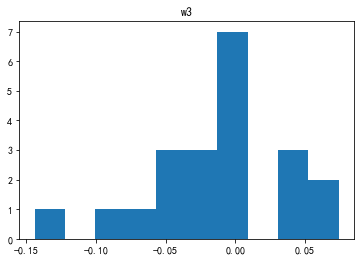

w3的均值-0.011925513186691142
w的均值[-0.99853694  0.00427153  0.00298056  1.55328108 -0.01192551  1.5622585 ]


In [38]:
#Problem 14
#多项式转换器
poly = PolynomialFeatures(2)
W = []
Eout = np.array([])
Ein = np.array([])
for i in range(m):
    X, y = generate(n)
    X_poly = poly.fit_transform(X)
    
    w_poly = inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    ein = np.mean(np.sign(X_poly.dot(w_poly) * y) < 0)
    Ein = np.append(Ein, ein)
    #测试数据
    X_test, y_test = generate(n)
    X_test_poly = poly.fit_transform(X_test)
    eout = np.mean(np.sign(X_test_poly.dot(w_poly) * y_test) < 0)
    Eout  = np.append(Eout, eout)
    
    #记录w
    W.append(w_poly)

W = np.array(W)
w3 = W[:, 4]
plt.hist(w3)
plt.title('w3')
plt.show()
print("w3的均值{}".format(w3.mean()))
print("w的均值" + str(np.mean(W, axis=0)))

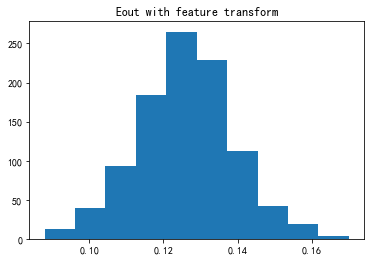

0.125842


In [33]:
#Problem 15
plt.hist(Eout)
plt.title('Eout with feature transform')
plt.show()
print(Eout.mean())

#### Problem 18

In [34]:
import numpy as np

def preprocess(X):
    """
    添加偏置项
    """
    n = X.shape[0]
    return np.c_[np.ones(n), X]

#数据读入
data_train = np.genfromtxt("hw3_train.dat")
X_train = data_train[:, :-1]
y_train = data_train[:, -1].reshape(-1, 1)
X_train = preprocess(X_train)
data_test = np.genfromtxt("hw3_test.dat")
X_test = data_test[:, :-1]
y_test = data_test[:, -1].reshape(-1, 1)
X_test = preprocess(X_test)

#定义函数
def sigmoid(s):
    return 1 / (np.exp(-s) + 1)

def gradient(X, w, y):
    temp1 = - X.dot(w) * y
    temp2 = sigmoid(temp1)
    temp3 = - X * y
    grad = np.mean(temp3 * temp2, axis=0).reshape(-1, 1)

    return grad

#数据组数和维度
n, m = X_train.shape

#Problem 18
w = np.zeros((m, 1))
k = 0.001

for i in range(2000):
    grad = gradient(X_train, w, y_train)
    w -= k * grad

#计算标签
y_test_pred = X_test.dot(w)
y_test_pred[y_test_pred > 0] = 1
y_test_pred[y_test_pred <= 0] = -1
#计算Eout
Eout = np.mean(y_test_pred != y_test)
#求出误差
print(Eout)
print(w)

0.475
[[ 0.01878417]
 [-0.01260595]
 [ 0.04084862]
 [-0.03266317]
 [ 0.01502334]
 [-0.03667437]
 [ 0.01255934]
 [ 0.04815065]
 [-0.02206419]
 [ 0.02479605]
 [ 0.06899284]
 [ 0.0193719 ]
 [-0.01988549]
 [-0.0087049 ]
 [ 0.04605863]
 [ 0.05793382]
 [ 0.061218  ]
 [-0.04720391]
 [ 0.06070375]
 [-0.01610907]
 [-0.03484607]]


#### Problem 19

In [35]:
#Problem 19
w = np.zeros((m, 1))
k = 0.01

for i in range(2000):
    grad = gradient(X_train, w, y_train)
    w -= k * grad

#计算标签
y_test_pred = X_test.dot(w)
y_test_pred[y_test_pred > 0] = 1
y_test_pred[y_test_pred <= 0] = -1
#计算Eout
Eout = np.mean(y_test_pred != y_test)
#求出误差
print(Eout)
print(w)

0.22
[[-0.00385379]
 [-0.18914564]
 [ 0.26625908]
 [-0.35356593]
 [ 0.04088776]
 [-0.3794296 ]
 [ 0.01982783]
 [ 0.33391527]
 [-0.26386754]
 [ 0.13489328]
 [ 0.4914191 ]
 [ 0.08726107]
 [-0.25537728]
 [-0.16291797]
 [ 0.30073678]
 [ 0.40014954]
 [ 0.43218808]
 [-0.46227968]
 [ 0.43230193]
 [-0.20786372]
 [-0.36936337]]


#### Problem 20

In [36]:
#Problem 20
w = np.zeros((m, 1))
k = 0.001

#计数器
j = 0
for i in range(2000):
    x = X_train[j, :].reshape(1, -1)
    s = gradient(x, w, y_train[j])
    w -= k * s
    #更新下标
    j += 1
    j = j % n

#计算标签
y_test_pred = X_test.dot(w)
y_test_pred[y_test_pred > 0] = 1
y_test_pred[y_test_pred <= 0] = -1
#计算sign(Xw)
Eout = np.mean(y_test_pred != y_test)
#求出误差
print(Eout)
print(w)

0.473
[[ 0.01826899]
 [-0.01308051]
 [ 0.04072894]
 [-0.03295698]
 [ 0.01498363]
 [-0.03691042]
 [ 0.01232819]
 [ 0.04791334]
 [-0.02244958]
 [ 0.02470544]
 [ 0.06878235]
 [ 0.01897378]
 [-0.02032107]
 [-0.00901469]
 [ 0.04589259]
 [ 0.05776824]
 [ 0.06102487]
 [-0.04756147]
 [ 0.06035018]
 [-0.01660574]
 [-0.03509342]]
